In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
plt.rcParams['figure.figsize'] = 15, 5


In [2]:
def calcPermut(nodes, edges):
  ret = [[]]
  for i in range(1,nodes+1):
    retCur = []
    for x in ret:
      #print(x)
      for g in x:
        gi = x.index(g)
        retCur.append(x[:gi]+[g+[i]]+x[gi+1:])
      x.append([i])
      retCur.append(x)
    #print(retCur)
    ret = retCur
  return ret

In [3]:
def calcmu(module, edges):
  ret = 0
  for e in edges:
    if ((e[0] in module) & (e[1] in module)):
      ret=ret+e[2]
  return ret

def calcepsi(moduleA, moduleB, edges):
  ret = 0
  for e in edges:
    if ((e[0] in moduleA) & (e[1] in moduleB)):
      ret=ret+e[2]
  return ret

In [4]:
def calcA(module,edges):
  return calcmu(module,edges) / len(module) / len(module)
def calcE(moduleA, moduleB, edges):
  if(moduleA == moduleB):
    return 0
  else:
    return (calcepsi(moduleA, moduleB, edges) + calcepsi(moduleB, moduleA, edges)) / 2 / len(moduleA) / len(moduleB)

In [5]:
def basicMQ(modulSet, edges):
  k = len(modulSet)
  if (k == 1):
    return calcA(modulSet[0],edges)
  else:
    aSum = 0
    eSum = 0
    for i in modulSet:
      aSum=aSum + calcA(i,edges)
      for j in modulSet:
        eSum = eSum + calcE(i,j,edges)
    return aSum / k - eSum / (k*(k-1)/2) / 2

In [6]:
def turboCF(modulSet, edges, i):
  mui = calcmu(i, edges)
  if (mui == 0):
    return 0
  else:
    sum = 0
    for j in modulSet:
      if (i != j):
        sum = sum + calcepsi(i,j,edges) + calcepsi(j,i,edges)
    return 2*mui / (2*mui + sum)

def turboMQ(modulSet, edges):
  sum = 0
  for i in modulSet:
    sum = sum + turboCF(modulSet, edges, i)
  return sum

[[[1, 2, 3, 4, 5, 6, 7, 8]], [[1, 2, 3, 4, 5, 6, 7], [8]], [[1, 2, 3, 4, 5, 6, 8], [7]], [[1, 2, 3, 4, 5, 6], [7, 8]], [[1, 2, 3, 4, 5, 6], [7], [8]], [[1, 2, 3, 4, 5, 7, 8], [6]], [[1, 2, 3, 4, 5, 7], [6, 8]], [[1, 2, 3, 4, 5, 7], [6], [8]], [[1, 2, 3, 4, 5, 8], [6, 7]], [[1, 2, 3, 4, 5], [6, 7, 8]], [[1, 2, 3, 4, 5], [6, 7], [8]], [[1, 2, 3, 4, 5, 8], [6], [7]], [[1, 2, 3, 4, 5], [6, 8], [7]], [[1, 2, 3, 4, 5], [6], [7, 8]], [[1, 2, 3, 4, 5], [6], [7], [8]], [[1, 2, 3, 4, 6, 7, 8], [5]], [[1, 2, 3, 4, 6, 7], [5, 8]], [[1, 2, 3, 4, 6, 7], [5], [8]], [[1, 2, 3, 4, 6, 8], [5, 7]], [[1, 2, 3, 4, 6], [5, 7, 8]], [[1, 2, 3, 4, 6], [5, 7], [8]], [[1, 2, 3, 4, 6, 8], [5], [7]], [[1, 2, 3, 4, 6], [5, 8], [7]], [[1, 2, 3, 4, 6], [5], [7, 8]], [[1, 2, 3, 4, 6], [5], [7], [8]], [[1, 2, 3, 4, 7, 8], [5, 6]], [[1, 2, 3, 4, 7], [5, 6, 8]], [[1, 2, 3, 4, 7], [5, 6], [8]], [[1, 2, 3, 4, 8], [5, 6, 7]], [[1, 2, 3, 4], [5, 6, 7, 8]], [[1, 2, 3, 4], [5, 6, 7], [8]], [[1, 2, 3, 4, 8], [5, 6], [7]], [[1, 

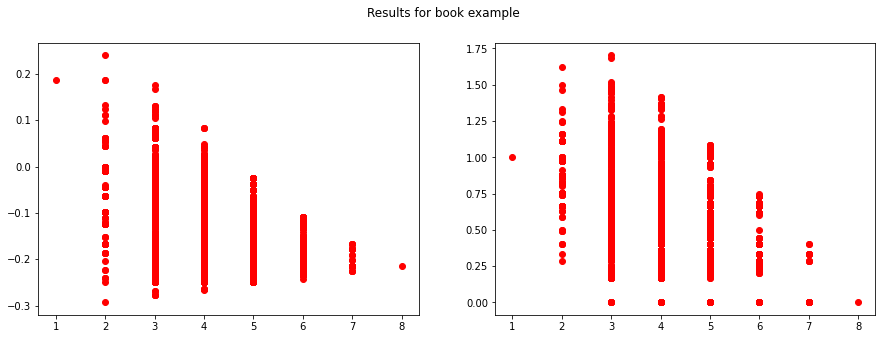

In [11]:
nodes = 8
edges = [(1,2,1), (2,3,1), (1,3,1),(4,1,1),(3,4,1),(2,5,1),(4,5,1),(4,6,1),(6,7,1),(6,8,1),(7,8,1),(7,5,1)]
modules = calcPermut(nodes,edges)
print(modules)
exp = [[1,2,3],[4,5],[6,7,8]]
print(exp)
#print(calcA(modules[3][0], edges))
#print(calcE(modules[3][0],modules[3][1], edges))
print(basicMQ(exp, edges))

modulesEval = [basicMQ(item, edges) for item in modules]
modulesEvalTurbo = [turboMQ(item, edges) for item in modules]
modulesSize = [len(item) for item in modules]

print(modulesEval)
moduleBest = modulesEval.index(max(modulesEval))
print(modules[moduleBest])
print(modulesEval[moduleBest])
moduleBestT = modulesEvalTurbo.index(max(modulesEvalTurbo))
print(modules[moduleBestT])
print(modulesEvalTurbo[moduleBestT])

#mu = 0
#std = 1
#x = np.linspace(start=-4, stop=4, num=8)
#y = stats.norm.pdf(x, mu, std) 
#plt.plot(modulesSize, modulesEval, 'ro')

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Results for book example')
ax1.plot(modulesSize, modulesEval, 'ro')
ax2.plot(modulesSize, modulesEvalTurbo, 'ro')

plt.show()

[[1, 2, 3], [4, 5], [6, 7, 8]]
0.36111111111111105
[[1, 2, 3], [4, 5, 6, 7, 8], [9, 10]]
0.44888888888888884
[[1, 2, 3], [4, 5], [6, 7, 8], [9, 10]]
2.9944444444444445
115975


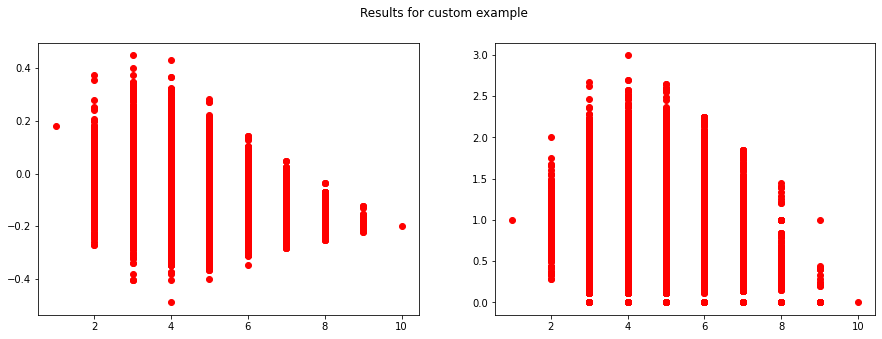

In [12]:
nodes = 10
edges = [(1,2,1), (2,3,1), (1,3,1),(4,1,1),(3,4,1),(2,5,1),(4,5,1),(4,6,1),(6,7,1),(6,8,1),(7,8,1),(7,5,1)      ,(9,10,1),(10,9,1),(5,4,1)
#,(1,1,1), (2,2,1), (3,3,1), (4,4,1), (5,5,1), (6,6,1), (7,7,1), (8,8,1)
,(2,1,1),(3,2,1),(3,1,1),  # (8,6,1),(8,7,1),(7,6,1)
]
modules = calcPermut(nodes,edges)
#print(modules)
exp = [[1,2,3],[4,5],[6,7,8]]
print(exp)
#print(calcA(modules[3][0], edges))
#print(calcE(modules[3][0],modules[3][1], edges))
print(basicMQ(exp, edges))

modulesEval = [basicMQ(item, edges) for item in modules]
modulesEvalTurbo = [turboMQ(item, edges) for item in modules]
modulesSize = [len(item) for item in modules]

#print(modulesEval)
moduleBest = modulesEval.index(max(modulesEval))
print(modules[moduleBest])
print(modulesEval[moduleBest])
moduleBestT = modulesEvalTurbo.index(max(modulesEvalTurbo))
print(modules[moduleBestT])
print(modulesEvalTurbo[moduleBestT])

print(len(modules))
#mu = 0
#std = 1
#x = np.linspace(start=-4, stop=4, num=8)
#y = stats.norm.pdf(x, mu, std) 
#plt.plot(modulesSize, modulesEval, 'ro')
#plt.show()
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Results for custom example')
ax1.plot(modulesSize, modulesEval, 'ro')
ax2.plot(modulesSize, modulesEvalTurbo, 'ro')

plt.show()

[[[1, 2, 3, 4, 5, 6, 7, 8]], [[1, 2, 3, 4, 5, 6, 7], [8]], [[1, 2, 3, 4, 5, 6, 8], [7]], [[1, 2, 3, 4, 5, 6], [7, 8]], [[1, 2, 3, 4, 5, 6], [7], [8]], [[1, 2, 3, 4, 5, 7, 8], [6]], [[1, 2, 3, 4, 5, 7], [6, 8]], [[1, 2, 3, 4, 5, 7], [6], [8]], [[1, 2, 3, 4, 5, 8], [6, 7]], [[1, 2, 3, 4, 5], [6, 7, 8]], [[1, 2, 3, 4, 5], [6, 7], [8]], [[1, 2, 3, 4, 5, 8], [6], [7]], [[1, 2, 3, 4, 5], [6, 8], [7]], [[1, 2, 3, 4, 5], [6], [7, 8]], [[1, 2, 3, 4, 5], [6], [7], [8]], [[1, 2, 3, 4, 6, 7, 8], [5]], [[1, 2, 3, 4, 6, 7], [5, 8]], [[1, 2, 3, 4, 6, 7], [5], [8]], [[1, 2, 3, 4, 6, 8], [5, 7]], [[1, 2, 3, 4, 6], [5, 7, 8]], [[1, 2, 3, 4, 6], [5, 7], [8]], [[1, 2, 3, 4, 6, 8], [5], [7]], [[1, 2, 3, 4, 6], [5, 8], [7]], [[1, 2, 3, 4, 6], [5], [7, 8]], [[1, 2, 3, 4, 6], [5], [7], [8]], [[1, 2, 3, 4, 7, 8], [5, 6]], [[1, 2, 3, 4, 7], [5, 6, 8]], [[1, 2, 3, 4, 7], [5, 6], [8]], [[1, 2, 3, 4, 8], [5, 6, 7]], [[1, 2, 3, 4], [5, 6, 7, 8]], [[1, 2, 3, 4], [5, 6, 7], [8]], [[1, 2, 3, 4, 8], [5, 6], [7]], [[1, 

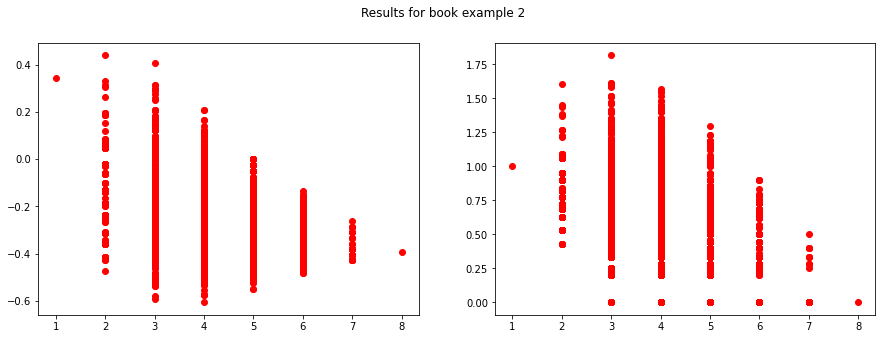

In [13]:
nodes = 8
edges = [(1,2,1),(2,1,1),(1,5,1),(5,1,1),(2,5,1),(5,2,1),(2,3,1),(3,2,1),(3,4,1),(4,3,1),(4,5,1),(5,4,1)
,(4,8,1), (8,4,1), (8,7,1), (7,8,1),(5,8,1),(8,5,1),(8,6,1),(6,8,1),(7,6,1),(6,7,1)]
modules = calcPermut(nodes,edges)
print(modules)
exp = [[1,2,5],[3,4],[6,7,8]]
print(exp)
#print(calcA(modules[3][0], edges))
#print(calcE(modules[3][0],modules[3][1], edges))
print(turboMQ(exp, edges))

modulesEval = [basicMQ(item, edges) for item in modules]
modulesEvalTurbo = [turboMQ(item, edges) for item in modules]
modulesSize = [len(item) for item in modules]

print(modulesEval)
moduleBest = modulesEval.index(max(modulesEval))
print(modules[moduleBest])
print(modulesEval[moduleBest])
moduleBestT = modulesEvalTurbo.index(max(modulesEvalTurbo))
print(modules[moduleBestT])
print(modulesEvalTurbo[moduleBestT])

#mu = 0
#std = 1
#x = np.linspace(start=-4, stop=4, num=8)
#y = stats.norm.pdf(x, mu, std) 
#plt.plot(modulesSize, modulesEval, 'ro')

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Results for book example 2')
ax1.plot(modulesSize, modulesEval, 'ro')
ax2.plot(modulesSize, modulesEvalTurbo, 'ro')

plt.show()